# Threading
This module constructs higher-level threading interfaces on the top lower level _thread module

In [1]:
import threading

In [3]:
# Return the number of Thread objects currently alive. 
# The returned count is equal to the length of the list returned by enumerate().
threading.active_count()

7

In [6]:
# Return the current Thread object, corresponding to the caller’s thread of control. 
# If the caller’s thread of control was not created through the threading module, 
# a dummy thread object with limited functionality is returned.
threading.current_thread()

<_MainThread(MainThread, started 7028)>

Handle uncaught exception raised by Thread.run().

The args argument has the following attributes:

* exc_type: Exception type.
* exc_value: Exception value, can be None.
* exc_traceback: Exception traceback, can be None.
* thread: Thread which raised the exception, can be None.
    
If exc_type is SystemExit, the exception is silently ignored. Otherwise, the exception is printed out on sys.stderr.

If this function raises an exception, sys.excepthook() is called to handle it.

threading.excepthook() can be overridden to control how uncaught exceptions raised by Thread.run() are handled.

Storing exc_value using a custom hook can create a reference cycle. It should be cleared explicitly to break the reference cycle when the exception is no longer needed.

Storing thread using a custom hook can resurrect it if it is set to an object which is being finalized. Avoid storing thread after the custom hook completes to avoid resurrecting objects.

In [7]:
# Return the ‘thread identifier’ of the current thread. This is a nonzero integer. 
# Its value has no direct meaning; it is intended as a magic cookie to be used e.g. 
# to index a dictionary of thread-specific data. Thread identifiers may be recycled 
# when a thread exits and another thread is created.
threading.get_ident()

7028

In [8]:
# Return the native integral Thread ID of the current thread assigned by the kernel. 
# This is a non-negative integer. Its value may be used to uniquely identify this 
# particular thread system-wide (until the thread terminates, after which the value may be recycled by the OS).
threading.get_native_id()

7028

In [9]:
# Return a list of all Thread objects currently alive. The list includes daemonic threads, dummy thread objects 
# created by current_thread(), and the main thread. It excludes terminated threads and threads that have not yet been started.
threading.enumerate()

[<_MainThread(MainThread, started 7028)>,
 <Thread(Tornado selector, started daemon 1016)>,
 <Thread(Thread-4, started daemon 11104)>,
 <Heartbeat(Thread-5, started daemon 11164)>,
 <Thread(Tornado selector, started daemon 1816)>,
 <HistorySavingThread(IPythonHistorySavingThread, started 4620)>,
 <ParentPollerWindows(Thread-3, started daemon 10104)>]

In [14]:
# Return the main Thread object. In normal conditions, the main thread is the thread from which the Python interpreter was started.
print(threading.main_thread())

<_MainThread(MainThread, started 7028)>


In [19]:
# Set a trace function for all threads started from the threading module. 
# The func will be passed to sys.settrace() for each thread, before its run() method is called.
threading.settrace()

None
None
None
None
None
None
None


In [20]:
# Set a profile function for all threads started from the threading module. 
# The func will be passed to sys.setprofile() for each thread, before its run() method is called.
threading.setprofile()

TypeError: setprofile() missing 1 required positional argument: 'func'

Return the thread stack size used when creating new threads. The optional size argument specifies the stack size to be used for subsequently created threads, and must be 0 (use platform or configured default) or a positive integer value of at least 32,768 (32 KiB). If size is not specified, 0 is used. If changing the thread stack size is unsupported, a RuntimeError is raised. If the specified stack size is invalid, a ValueError is raised and the stack size is unmodified. 32 KiB is currently the minimum supported stack size value to guarantee sufficient stack space for the interpreter itself. Note that some platforms may have particular restrictions on values for the stack size, such as requiring a minimum stack size > 32 KiB or requiring allocation in multiples of the system memory page size - platform documentation should be referred to for more information (4 KiB pages are common; using multiples of 4096 for the stack size is the suggested approach in the absence of more specific information).

In [22]:
threading.stack_size(threading.main_thread())

TypeError: '_MainThread' object cannot be interpreted as an integer

In [26]:
# The maximum value allowed for the timeout parameter of blocking functions 
# (Lock.acquire(), RLock.acquire(), Condition.wait(), etc.). 
# Specifying a timeout greater than this value will raise an OverflowError.
threading.TIMEOUT_MAX

4294967.0

## Thread-Local Data

In [27]:
# Thread-local data is data whose values are thread specific. To manage threa-local data, 
# just create an instance of local (or a subclass) and store attributes on it
mydata = threading.local()
mydata.x = 1

## Thread Objects

The Thread class represents an activity that is run in a separate thread of control. There are two ways to specify the activity: by passing a callable object to the constructor, or by overriding the run() method in a subclass. No other methods (except for the constructor) should be overridden in a subclass. In other words, only override the __init__() and run() methods of this class.

Once a thread object is created, its activity must be started by calling the thread’s start() method. This invokes the run() method in a separate thread of control.

Once the thread’s activity is started, the thread is considered ‘alive’. It stops being alive when its run() method terminates – either normally, or by raising an unhandled exception. The is_alive() method tests whether the thread is alive.

Other threads can call a thread’s join() method. This blocks the calling thread until the thread whose join() method is called is terminated.

A thread has a name. The name can be passed to the constructor, and read or changed through the name attribute.

If the run() method raises an exception, threading.excepthook() is called to handle it. By default, threading.excepthook() ignores silently SystemExit.

A thread can be flagged as a “daemon thread”. The significance of this flag is that the entire Python program exits when only daemon threads are left. The initial value is inherited from the creating thread. The flag can be set through the daemon property or the daemon constructor argument.

Note Daemon threads are abruptly stopped at shutdown. Their resources (such as open files, database transactions, etc.) may not be released properly. If you want your threads to stop gracefully, make them non-daemonic and use a suitable signalling mechanism such as an Event.
There is a “main thread” object; this corresponds to the initial thread of control in the Python program. It is not a daemon thread.

There is the possibility that “dummy thread objects” are created. These are thread objects corresponding to “alien threads”, which are threads of control started outside the threading module, such as directly from C code. Dummy thread objects have limited functionality; they are always considered alive and daemonic, and cannot be join()ed. They are never deleted, since it is impossible to detect the termination of alien threads.

*class* threading.**Thread**(group=None, target=None, name=None, args=(), kwargs={}, *, daemon=None)*

This constructor should always be called with keyword arguments. Arguments are:

group should be None; reserved for future extension when a ThreadGroup class is implemented.

target is the callable object to be invoked by the run() method. Defaults to None, meaning nothing is called.

name is the thread name. By default, a unique name is constructed of the form “Thread-N” where N is a small decimal number.

args is the argument tuple for the target invocation. Defaults to ().

kwargs is a dictionary of keyword arguments for the target invocation. Defaults to {}.

If not None, daemon explicitly sets whether the thread is daemonic. If None (the default), the daemonic property is inherited from the current thread.

If the subclass overrides the constructor, it must make sure to invoke the base class constructor (Thread.__init__()) before doing anything else to the thread.

Changed in version 3.3: Added the daemon argument.

* **start()**  
Start the thread's activity
It must be called at most once per thread object. It arranges for the object's `run()` method to be invoked in a seperate thread of control.
This method will cause an `RunTimeError`. If called more that omce on the same thread object.
* **run()**  
Method representing the thread's activity.
You may override this method in a subclass. The standard `run()` method invokes the callable object passed to the object's constructor as the target arguments, if any, with positional and keyword arguments taken from the args and kwargs arguments, respectively.
* **join(timeout=None)**
Wait untill the thread terminates. This blocks the calling thread untill the thread whose `join()`, method is called terminates - either normally or through an unhandled exception or untill the optional timeout occurs.  

When the timeout arguments is present and not `None`. It should be a floating point number specifying a timeout for the operation in secs (or fractions thereof). As `join()` always returns None you must call `is_alive()` after `join()` to decide whether a timeoout happened - if the thread is still alive, the `join()` call timed out.

When the timeout arguemtns is not present or None the operation wil block untill the thread terminates.

A thread can be `join()` ed many times.

`join()` raises a RuntimeError if an attempt is made to join the current thread as that would cause a deadlock. It is also an error to `join()` a thread before it has been started and attempts to do so raise the same exception.
* **name**  
A string used for identification purposes only. It has so semantics. Multiple threads may be given the same. The initial name is set by the constructer.
* **getName()**
* **setName()**
Old getter/Setter API for name; use it directly as a property insted
* ident
The thread identifier of this thread or `None`if the thread has not been started. This is a nonzero integer. See the get_ident() function. Thread identifier may be recycled when a thread exits and another thread is created. The identifier is available even after the thread has exited.
* **native_id**
The native integral thread ID of this thread. This is a non-negative integer, or `None` if the thread has not been started. See the get_native_id() function. This represents the Thread ID (TID) as assigned to the thread by the OS(kernel). Its value may be used to uniquely identify this particular thread system-wide (untill the thread terminates, after which the value may be recycled by the OS).

Note Similar to Process IDs, Thread IDs are only valid (guaranteed unique system-wide) from the time the thread is created     until the thread has been terminated.
* **is_alive()**
Return whether the thread is alive
This method returns `True` just before the `run()` method starts until just after the `run()` method terminates. THe module function `enumerate()` returns a list of all alive threads.
* **daemon**
A boolean value indicating whether this thread is a daemon thread (True) or not (False). This must be set before `start()` is called, otherwise RuntimeError is raised its initial value is inherited from the creating thread; the main thread is not a daemon thread and therefore all threads created in the main thread default to `daemon` == `False`.
The entire Python program exits when no aline non-daemon threads are left
* **isDaemon()**
* **setDaemon()**
Old getter/setter API for daemon; use it directly as property instead

## CPython Implementation Detail:
In CPython, due to the Global Interpreter Lock, only one thread can execute Python code at once (even though certain performance-oriented libraries might overcome this limitation). If you want your application to make better use of the computational resources of multi-core machines, you are advised to use multiprocessing or concurrent.futures.ProcessPoolExecutor. However, threading is still an appropriate model if you want to run multiple I/O-bound tasks simultaneously.

### Global Interpreter Lock - 
The mechanism used by the CPython interpreter to assure that only ont thread executes Python bytecode at a time. This simplifies the CPython implementation by making the Object Model (including critical built-in types such as dict) implictly safe againsy concurreny access. Locking the entire interpreter makes it easier for the interpreter to be multi-threaded at the expense of much of the parallelism afforded by multi-processor machines.

However, some extension modules, either standard or third-party, are designed so as to release the GIL when doing computationally-intensive tasks such as compression or hashing. Also, the GIL is always released when doing I/O.

Past efforts to create a “free-threaded” interpreter (one which locks shared data at a much finer granularity) have not been successful because performance suffered in the common single-processor case. It is believed that overcoming this performance issue would make the implementation much more complicated and therefore costlier to maintain.

## Lock Objects
A primitive lock is a synchronization primitive that is not owned by a particular thread when locked. In Python, it is currently the lowest level synchronization primitive available, implemented directly by the _thread extension module.

A primitive lock is in one of two states, “locked” or “unlocked”. It is created in the unlocked state. It has two basic methods, acquire() and release(). When the state is unlocked, acquire() changes the state to locked and returns immediately. When the state is locked, acquire() blocks until a call to release() in another thread changes it to unlocked, then the acquire() call resets it to locked and returns. The release() method should only be called in the locked state; it changes the state to unlocked and returns immediately. If an attempt is made to release an unlocked lock, a RuntimeError will be raised.

*class* threading.**Lock**
The class implementing primitive lock objects. Once a thread has acquired a lock, subsequent attempts to acquire it block, until it is released; any thread may release it.

Note that Lock is actually a factory function which returns an instance of the most efficient version of the concrete Lock class that is supported by the platform.

**acquire** *(blocking=True, timeout = -1)
Acquire a lock, blocking or non-blocking.

When invoked with the blocking argument set to True (the default), block until the lock is unlocked, then set it to locked and return True.

When invoked with the blocking argument set to False, do not block. If a call with blocking set to True would block, return False immediately; otherwise, set the lock to locked and return True.

When invoked with the floating-point timeout argument set to a positive value, block for at most the number of seconds specified by timeout and as long as the lock cannot be acquired. A timeout argument of -1 specifies an unbounded wait. It is forbidden to specify a timeout when blocking is false.

The return value is True if the lock is acquired successfully, False if not (for example if the timeout expired).

**release()**  
Release a lock. This can be called from any thread not only the thread which has acquired the lock.

When the lock is locked reset it to unlocked and return if any other threads are blocked waiting for the lock to become unlocked allow exactly one of them to preceed.

When invoked on an unlocked lock, a RuntimeError is raised

There is no return value.

**locked()**  
Return true if the lock is acquired.

## Rlock Objects
A reentrant lock is a synchronization primitive that may be acquired multiple times by the same thread. Internally, it uses the concepts of “owning thread” and “recursion level” in addition to the locked/unlocked state used by primitive locks. In the locked state, some thread owns the lock; in the unlocked state, no thread owns it.

To lock the lock, a thread calls its acquire() method; this returns once the thread owns the lock. To unlock the lock, a thread calls its release() method. acquire()/release() call pairs may be nested; only the final release() (the release() of the outermost pair) resets the lock to unlocked and allows another thread blocked in acquire() to proceed.

*class* threading.**Rlock**  
This class implements reentrant lock objects. A reentrant lock must be released by the thread that acquired it. Once a thread has acquired a reentrant lock, the same thread may acquire it again without blocking; the thread must release it once for each time it has acquired it.

Note that RLock is actually a factory function which returns an instance of the most efficient version of the concrete RLock class that is supported by the platform.

**acquire(blocking=True, timeout=-1)**
Acquire a lock, blocking or non-blocking.

When invoked without arguments: if this thread already owns the lock, increment the recursion level by one, and return immediately. Otherwise, if another thread owns the lock, block until the lock is unlocked. Once the lock is unlocked (not owned by any thread), then grab ownership, set the recursion level to one, and return. If more than one thread is blocked waiting until the lock is unlocked, only one at a time will be able to grab ownership of the lock. There is no return value in this case.

When invoked with the blocking argument set to true, do the same thing as when called without arguments, and return True.

When invoked with the blocking argument set to false, do not block. If a call without an argument would block, return False immediately; otherwise, do the same thing as when called without arguments, and return True.

When invoked with the floating-point timeout argument set to a positive value, block for at most the number of seconds specified by timeout and as long as the lock cannot be acquired. Return True if the lock has been acquired, false if the timeout has elapsed.

**release()**  
Release a lock, decrementing the recursion level. If after the decrement it is zero, reset the lock to unlocked (not owned by any thread), and if any other threads are blocked waiting for the lock to become unlocked, allow exactly one of them to proceed. If after the decrement the recursion level is still nonzero, the lock remains locked and owned by the calling thread.

Only call this method when the calling thread owns the lock. A RuntimeError is raised if this method is called when the lock is unlocked.

There is no return value.

## Condition Objects

A condition variable is always associated with some kind of lock; this can be passed in or one will be created by default. Passing one in is useful when several condition variables must share the same lock. The lock is part of the condition object: you don’t have to track it separately.

A condition variable obeys the context management protocol: using the with statement acquires the associated lock for the duration of the enclosed block. The acquire() and release() methods also call the corresponding methods of the associated lock.

Other methods must be called with the associated lock held. The wait() method releases the lock, and then blocks until another thread awakens it by calling notify() or notify_all(). Once awakened, wait() re-acquires the lock and returns. It is also possible to specify a timeout.

The notify() method wakes up one of the threads waiting for the condition variable, if any are waiting. The notify_all() method wakes up all threads waiting for the condition variable.

Note: the notify() and notify_all() methods don’t release the lock; this means that the thread or threads awakened will not return from their wait() call immediately, but only when the thread that called notify() or notify_all() finally relinquishes ownership of the lock.

* class threading.**Condition** *(lock=None)*
This class implements condition variable objects. A condition variable allows one or more threads to wait until they are notified by another thread.

If the lock argument is given and not None, it must be a Lock or RLock object, and it is used as the underlying lock. Otherwise, a new RLock object is created and used as the underlying lock.

Changed in version 3.3: changed from a factory function to a class.

* **acquire(*args)**
Acquire the underlying lock. This method calls the corresponding method on the underlying lock; the return value is whatever that method returns.

* **release()**
Release the underlying lock. This method calls the corresponding method on the underlying lock; there is no return value.

* **wait(timeout=None)**
Wait until notified or until a timeout occurs. If the calling thread has not acquired the lock when this method is called, a RuntimeError is raised.

This method releases the underlying lock, and then blocks until it is awakened by a notify() or notify_all() call for the same condition variable in another thread, or until the optional timeout occurs. Once awakened or timed out, it re-acquires the lock and returns.

When the timeout argument is present and not None, it should be a floating point number specifying a timeout for the operation in seconds (or fractions thereof).

When the underlying lock is an RLock, it is not released using its release() method, since this may not actually unlock the lock when it was acquired multiple times recursively. Instead, an internal interface of the RLock class is used, which really unlocks it even when it has been recursively acquired several times. Another internal interface is then used to restore the recursion level when the lock is reacquired.

The return value is True unless a given timeout expired, in which case it is False.

Changed in version 3.2: Previously, the method always returned None.

* **wait_for**(predicate, timeout=None)

Wait until a condition evaluates to true. predicate should be a callable which result will be interpreted as a boolean value. A timeout may be provided giving the maximum time to wait.

This utility method may call wait() repeatedly until the predicate is satisfied, or until a timeout occurs. The return value is the last return value of the predicate and will evaluate to False if the method timed out.

Ignoring the timeout feature, calling this method is roughly equivalent to writing:
<pre>
while not predicate():
    cv.wait()</pre>
Therefore, the same rules apply as with wait(): The lock must be held when called and is re-acquired on return. The predicate is evaluated with the lock held.

New in version 3.2.

* **notify(n=1)**  
By default, wake up one thread waiting on this condition, if any. If the calling thread has not acquired the lock when this method is called, a RuntimeError is raised.

This method wakes up at most n of the threads waiting for the condition variable; it is a no-op if no threads are waiting.

The current implementation wakes up exactly n threads, if at least n threads are waiting. However, it’s not safe to rely on this behavior. A future, optimized implementation may occasionally wake up more than n threads.

Note: an awakened thread does not actually return from its wait() call until it can reacquire the lock. Since notify() does not release the lock, its caller should.

* **notify_all()**  
Wake up all threads waiting on this condition. This method acts like notify(), but wakes up all waiting threads instead of one. If the calling thread has not acquired the lock when this method is called, a RuntimeError is raised.

## Semaphore Objects

This is one of the oldest synchronization primitives in the history of computer science, invented by the early Dutch computer scientist Edsger W. Dijkstra (he used the names P() and V() instead of acquire() and release()).

A semaphore manages an internal counter which is decremented by each acquire() call and incremented by each release() call. The counter can never go below zero; when acquire() finds that it is zero, it blocks, waiting until some other thread calls release().

*class* threading.**Semaphore**(value=1)  

This class implements semaphore objects. A semaphore manages an atomic counter representing the number of release() calls minus the number of acquire() calls, plus an initial value. The acquire() method blocks if necessary until it can return without making the counter negative. If not given, value defaults to 1.

The optional argument gives the initial value for the internal counter; it defaults to 1. If the value given is less than 0, ValueError is raised.

**acquire**(blocking=True, timeout=None)

Accquire a semaphore. 

When invoked without arguments:

If the internal counter is larger than zero on entry, decrement it by one and return True immediately.

If the internal counter is zero on entry, block until awoken by a call to release(). Once awoken (and the counter is greater than 0), decrement the counter by 1 and return True. Exactly one thread will be awoken by each call to release(). The order in which threads are awoken should not be relied on.

When invoked with blocking set to false, do not block. If a call without an argument would block, return False immediately; otherwise, do the same thing as when called without arguments, and return True.

When invoked with a timeout other than None, it will block for at most timeout seconds. If acquire does not complete successfully in that interval, return False. Return True otherwise.

**release** *(n=1)*

Release a semaphore, incrementing the internal counter by n. When it was zero on entry and other threads are waiting for it to become larger than zero again, wake up n of those threads.

Changed in version 3.9: Added the n parameter to release multiple waiting threads at once.

*class* threading.**BoundedSemaphore**(value=1) 

Class implementing bounded semaphore objects. A bounded semaphore checks to make sure its current value doesn’t exceed its initial value. If it does, ValueError is raised. In most situations semaphores are used to guard resources with limited capacity. If the semaphore is released too many times it’s a sign of a bug. If not given, value defaults to 1.

## Event Objects

This is one of the simplest mechanisms for communication between threads: one thread signals an event and other threads wait for it.

An event object manages an internal flag that can be set to true with the set() method and reset to false with the clear() method. The wait() method blocks until the flag is true.

### class threading.Event
Class implementing event objects. An event manages a flag that can be set to true with the set() method and reset to false with the clear() method. The wait() method blocks until the flag is true. The flag is initially false.

Changed in version 3.3: changed from a factory function to a class.

* **is_set()**
Return True if and only if the internal flag is true.

* **set()**
Set the internal flag to true. All threads waiting for it to become true are awakened. Threads that call wait() once the flag is true will not block at all.

* **clear()**
Reset the internal flag to false. Subsequently, threads calling wait() will block until set() is called to set the internal flag to true again.

* **wait(timeout=None)**
Block until the internal flag is true. If the internal flag is true on entry, return immediately. Otherwise, block until another thread calls set() to set the flag to true, or until the optional timeout occurs.

When the timeout argument is present and not None, it should be a floating point number specifying a timeout for the operation in seconds (or fractions thereof).

This method returns True if and only if the internal flag has been set to true, either before the wait call or after the wait starts, so it will always return True except if a timeout is given and the operation times out.

## Timer Objects

This class represents an action that should be run only after a certain amount of time has passed — a timer. Timer is a subclass of Thread and as such also functions as an example of creating custom threads.

Timers are started, as with threads, by calling their start() method. The timer can be stopped (before its action has begun) by calling the cancel() method. The interval the timer will wait before executing its action may not be exactly the same as the interval specified by the user.

*class* threading.**Timer** *(interval, function, args=None, kwargs=None)*

Create a timer that will run function with arguments args and keyword arguments kwargs, after interval seconds have passed. If args is None (the default) then an empty list will be used. If kwargs is None (the default) then an empty dict will be used.

* **start()**
To start the timer

* **cancel()**
Stop the timer, and cancel the execution of the timer’s action. This will only work if the timer is still in its waiting stage.

## Barrier Objects

This class provides a simple synchronization primitive for use by a fixed number of threads that need to wait for each other. Each of the threads tries to pass the barrier by calling the wait() method and will block until all of the threads have made their wait() calls. At this point, the threads are released simultaneously.

The barrier can be reused any number of times for the same number of threads.
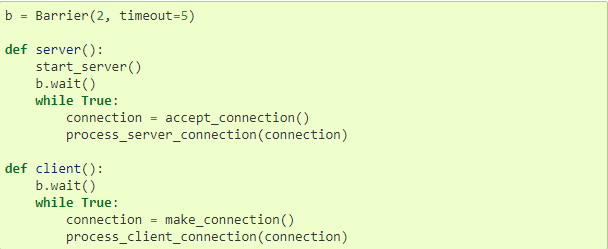

*class* threading.**Barrier**(parties, action=None, timeout=None)

Create a barrier object for parties number of threads. An action, when provided, is a callable to be called by one of the threads when they are released. timeout is the default timeout value if none is specified for the wait() method.

* **wait(timeout=None)**
Pass the barrier. When all the threads party to the barrier have called this function, they are all released simultaneously. If a timeout is provided, it is used in preference to any that was supplied to the class constructor.

The return value is an integer in the range 0 to parties – 1, different for each thread. This can be used to select a thread to do some special housekeeping, e.g.:

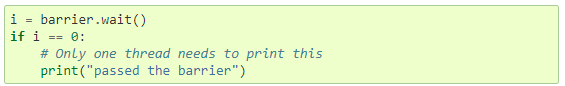

If an action was provided to the constructor, one of the threads will have called it prior to being released. Should this call raise an error, the barrier is put into the broken state.

If the call times out, the barrier is put into the broken state.

This method may raise a BrokenBarrierError exception if the barrier is broken or reset while a thread is waiting.

* **reset()**
Return the barrier to the default, empty state. Any threads waiting on it will receive the BrokenBarrierError exception.

Note that using this function may require some external synchronization if there are other threads whose state is unknown. If a barrier is broken it may be better to just leave it and create a new one.

* **abort()**
Put the barrier into a broken state. This causes any active or future calls to wait() to fail with the BrokenBarrierError. Use this for example if one of the threads needs to abort, to avoid deadlocking the application.

It may be preferable to simply create the barrier with a sensible timeout value to automatically guard against one of the threads going awry.

* **parties**
The number of threads required to pass the barrier.

* **n_waiting**
The number of threads currently waiting in the barrier.

* **broken**
A boolean that is True if the barrier is in the broken state.

exception threading.BrokenBarrierError
This exception, a subclass of RuntimeError, is raised when the Barrier object is reset or broken.